# EDA-11: Renewable Energy Infrastructure Growth Monitor
## Data Loading and Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on renewable energy infrastructure data, including data cleaning, EDA, trend analysis, and visualization.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install pyxlsb

## 1. Load and Explore the Renewable Energy Dataset

In [5]:

input_file = "..\data\IRENA_Stats_Tool_v2.xlsb"
xlsb = pd.ExcelFile(input_file, engine="pyxlsb")

for sheet in xlsb.sheet_names:
    df = pd.read_excel(input_file, sheet_name=sheet, engine="pyxlsb")
    df.to_csv(f"{sheet}.csv", index=False)

print("All sheets converted!")


All sheets converted!


In [5]:
df = pd.read_csv("..\data\Data_SecondaryData.csv")
df.head()

,Region Indicator,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),Public Flows (2022 USD M),SDG 7a1 Intl. Public Flows (2022 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,All types,2014,NaN,NaN,NaN,0.611770,NaN,NaN
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,All types,2017,NaN,NaN,NaN,0.317329,NaN,NaN
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2000,24585.0,5459.01,NaN,NaN,NaN,NaN
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2001,25781.0,5455.50,NaN,NaN,NaN,NaN
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,Natural gas,On-grid electricity,2002,26994.0,5891.01,NaN,NaN,NaN,NaN


## 2. Data Cleaning and Preprocessing

In [6]:
df = df.drop(["ISO3 code", "M49 code",
    "Group Technology",
    "Producer Type",
    "Heat Generation (TJ)",
    "Public Flows (2022 USD M)",
    "SDG 7a1 Intl. Public Flows (2022 USD M)",
    "SDG 7b1 RE capacity per capita (W/inhabitant)"], axis=1)
df.head()


,Region Indicator,Sub-region,Country,RE or Non-RE,Technology,Sub-Technology,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,Total Non-Renewable,Natural gas,Natural gas,2014,NaN,NaN
1,Africa,Northern Africa,Algeria,Total Non-Renewable,Natural gas,Natural gas,2017,NaN,NaN
2,Africa,Northern Africa,Algeria,Total Non-Renewable,Natural gas,Natural gas,2000,24585.0,5459.01
3,Africa,Northern Africa,Algeria,Total Non-Renewable,Natural gas,Natural gas,2001,25781.0,5455.50
4,Africa,Northern Africa,Algeria,Total Non-Renewable,Natural gas,Natural gas,2002,26994.0,5891.01


In [10]:
df_re = df[df["RE or Non-RE"].str.contains("Total Renewable", case=False, na=False)]
df_re.head()

,Region Indicator,Sub-region,Country,RE or Non-RE,Technology,Sub-Technology,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
85,Africa,Northern Africa,Algeria,Total Renewable,Solid biofuels,Other primary solid biofuels n.e.s.,2000,NaN,NaN
86,Africa,Northern Africa,Algeria,Total Renewable,Solid biofuels,Other primary solid biofuels n.e.s.,2001,NaN,NaN
87,Africa,Northern Africa,Algeria,Total Renewable,Solid biofuels,Other primary solid biofuels n.e.s.,2002,NaN,NaN
88,Africa,Northern Africa,Algeria,Total Renewable,Solid biofuels,Other primary solid biofuels n.e.s.,2003,NaN,NaN
89,Africa,Northern Africa,Algeria,Total Renewable,Solid biofuels,Other primary solid biofuels n.e.s.,2004,NaN,NaN


In [11]:
df_re.isnull().sum()

Region Indicator                           0
Sub-region                                 0
Country                                    0
RE or Non-RE                               0
Technology                                 0
Sub-Technology                             0
Year                                       0
Electricity Generation (GWh)           44503
Electricity Installed Capacity (MW)    42347
dtype: int64

In [12]:

df_re.notnull().sum()

Region Indicator                       67951
Sub-region                             67951
Country                                67951
RE or Non-RE                           67951
Technology                             67951
Sub-Technology                         67951
Year                                   67951
Electricity Generation (GWh)           23448
Electricity Installed Capacity (MW)    25604
dtype: int64

In [13]:
df_re = df_re.dropna()


In [14]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22720 entries, 157 to 91565
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region Indicator                     22720 non-null  object 
 1   Sub-region                           22720 non-null  object 
 2   Country                              22720 non-null  object 
 3   RE or Non-RE                         22720 non-null  object 
 4   Technology                           22720 non-null  object 
 5   Sub-Technology                       22720 non-null  object 
 6   Year                                 22720 non-null  int64  
 7   Electricity Generation (GWh)         22720 non-null  float64
 8   Electricity Installed Capacity (MW)  22720 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [ ]:
## download cleaned data in csv format
df_re.to_csv("cleaned_data.csv", index=False)


In [16]:


# Load dataset
df = pd.read_csv("cleaned_data.csv")

# --- STEP 1: Keep required columns only ---
required_cols = [
    "Region Indicator",
    "Country",
    "Technology",
    "Year",
    "Electricity Installed Capacity (MW)"
]

df = df[required_cols]

# --- STEP 2: Group region-wise ---
# Sort values to ensure correct chronological ordering
df = df.sort_values(by=["Region Indicator", "Technology", "Year"])

# --- STEP 3: Calculate previous year's capacity (lag) ---
df["Prev_Year_Capacity"] = df.groupby(["Region Indicator", "Technology"])["Electricity Installed Capacity (MW)"].shift(1)

# --- STEP 4: Calculate Growth Rate ---
df["Growth_Rate (%)"] = (
    (df["Electricity Installed Capacity (MW)"] - df["Prev_Year_Capacity"])
    / df["Prev_Year_Capacity"]
) * 100

# --- STEP 5: Remove rows where growth rate cannot be calculated ---
df = df.dropna(subset=["Growth_Rate (%)"])

# --- STEP 6: Save output ---
output_path = "region_wise_growth_rate.csv"
df.to_csv(output_path, index=False)

output_path


'region_wise_growth_rate.csv'

## 3. Exploratory Data Analysis (EDA)

In [17]:
# Display basic information
print("Dataset Shape:", df.shape)

print("First 5 rows:")
print(df.head())

print("Column Names:")
print(df.columns.tolist())

print("Data Types:")
print(df.dtypes)

print("Missing Values:")
print(df.isnull().sum())

Dataset Shape: (22669, 7)
First 5 rows:
     Region Indicator                            Country Technology  Year  \
3052           Africa                            Réunion     Biogas  2008   
3486           Africa                       South Africa     Biogas  2008   
3778           Africa  United Republic of Tanzania (the)     Biogas  2008   
3053           Africa                            Réunion     Biogas  2009   
3487           Africa                       South Africa     Biogas  2009   

      Electricity Installed Capacity (MW)  Prev_Year_Capacity  Growth_Rate (%)  
3052                                  2.0                 4.2       -52.380952  
3486                                  4.2                 2.0       110.000000  
3778                                  0.5                 4.2       -88.095238  
3053                                  2.0                 0.5       300.000000  
3487                                  4.2                 2.0       110.000000  
Column Name

In [18]:
# Summary statistics for renewable energy capacity

print("RENEWABLE ENERGY CAPACITY ANALYSIS")

print(f"\nYear Range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Countries in dataset: {df['Country'].nunique()}")
print(f"Regions in dataset: {df['Region Indicator'].nunique()}")
print(f"Technologies in dataset: {df['Technology'].nunique()}")


print("Capacity Statistics (MW):")
print(df['Electricity Installed Capacity (MW)'].describe())


print("Capacity by Technology (2023/Latest Year):")
latest_year = df['Year'].max()
tech_capacity = df[df['Year'] == latest_year].groupby('Technology')['Electricity Installed Capacity (MW)'].sum().sort_values(ascending=False)
print(tech_capacity)

RENEWABLE ENERGY CAPACITY ANALYSIS

Year Range: 2000 - 2023
Countries in dataset: 223
Regions in dataset: 5
Technologies in dataset: 11
Capacity Statistics (MW):
count     22669.000000
mean       1724.826006
std       12895.035289
min           0.001000
25%           2.168000
50%          24.855000
75%         240.000000
max      608920.000000
Name: Electricity Installed Capacity (MW), dtype: float64
Capacity by Technology (2023/Latest Year):
Technology
Solar photovoltaic           1405985.099
Renewable hydropower         1208054.372
Onshore wind energy           944064.485
Solid biofuels                 97814.707
Offshore wind energy           72737.708
Renewable municipal waste      21264.614
Biogas                         20945.382
Geothermal energy              15084.121
Solar thermal energy            6847.003
Liquid biofuels                 2238.609
Marine energy                    488.787
Name: Electricity Installed Capacity (MW), dtype: float64


In [ ]:
df_clean = df

In [20]:
# Top countries by renewable capacity

print(f"Top 20 Countries by Renewable Capacity ({latest_year}):")
top_countries = df_clean[df_clean['Year'] == latest_year].groupby('Country')['Electricity Installed Capacity (MW)'].sum().sort_values(ascending=False).head(20)
print(top_countries)

print(f"Top 10 Regions by Renewable Capacity ({latest_year}):")
top_regions = df_clean[df_clean['Year'] == latest_year].groupby('Region Indicator')['Electricity Installed Capacity (MW)'].sum().sort_values(ascending=False).head(10)
print(top_regions)

Top 20 Countries by Renewable Capacity (2023):
Country
China                                                         1453701.250
United States of America (the)                                 372454.800
Brazil                                                         194462.706
India                                                          175874.316
Germany                                                        158845.500
Japan                                                          121377.167
Canada                                                         107672.200
Spain                                                           77809.958
Italy                                                           61463.082
France                                                          60587.460
Türkiye                                                         58763.731
Russian Federation (the)                                        56130.600
United Kingdom of Great Britain and Northern Ireland (the

In [21]:
df_clean = df_clean.rename(columns={'Region Indicator': 'Region'})

## 4. Regional Analysis and Comparison

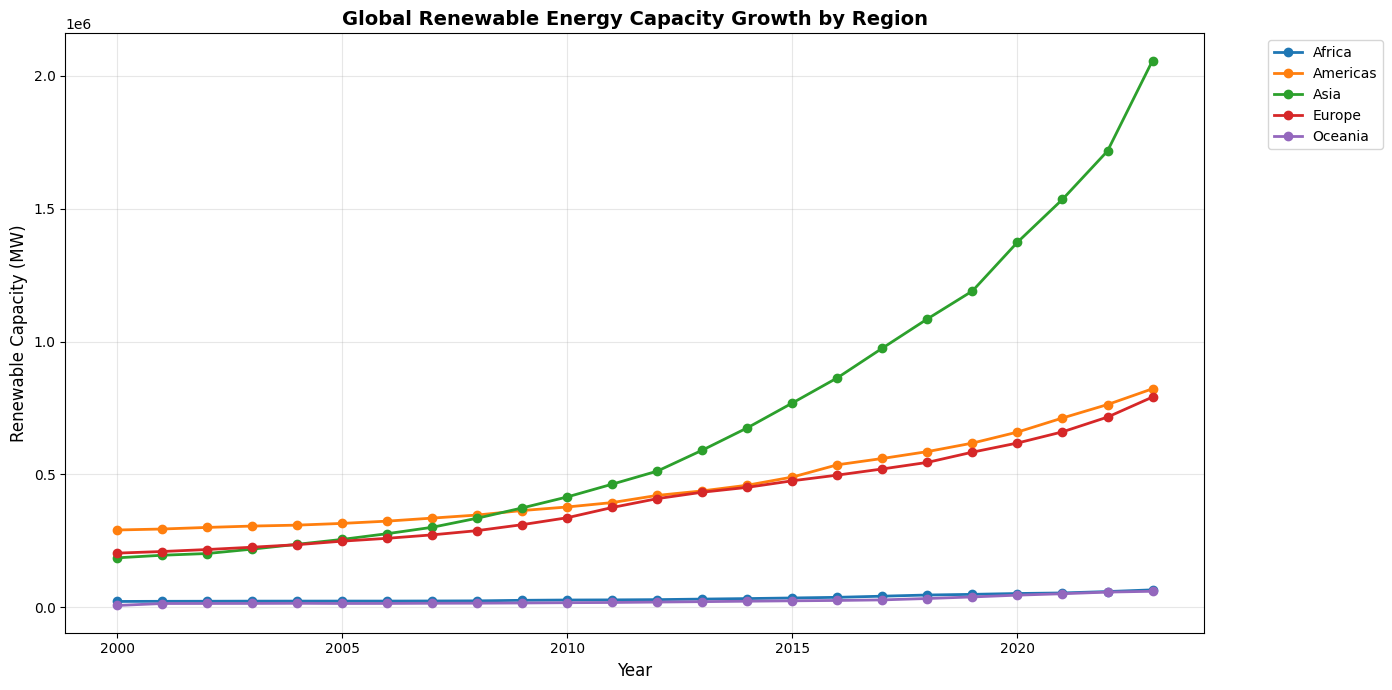

Regional capacity trends visualization saved!


In [22]:
# Regional capacity trends
regional_capacity = df_clean.groupby(['Region', 'Year'])['Electricity Installed Capacity (MW)'].sum().reset_index()

# Visualize regional trends
fig, ax = plt.subplots(figsize=(14, 7))
regions = regional_capacity['Region'].unique()
for region in regions:
    region_data = regional_capacity[regional_capacity['Region'] == region]
    ax.plot(region_data['Year'], region_data['Electricity Installed Capacity (MW)'], marker='o', label=region, linewidth=2)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Renewable Capacity (MW)', fontsize=12)
ax.set_title('Global Renewable Energy Capacity Growth by Region', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/regional_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Regional capacity trends visualization saved!")

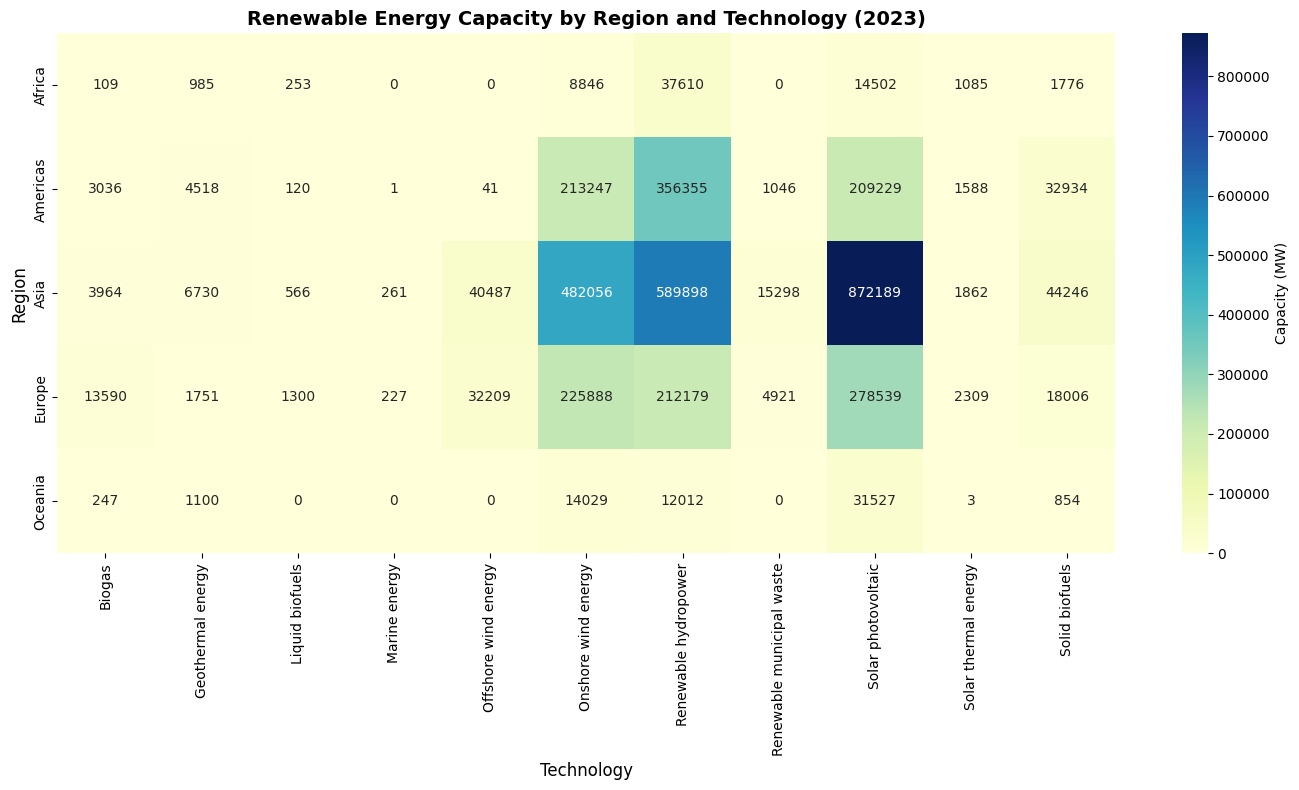

Technology-Region heatmap saved!


In [23]:
# Technology distribution by region
tech_region = df_clean[df_clean['Year'] == latest_year].groupby(['Region', 'Technology'])['Electricity Installed Capacity (MW)'].sum().reset_index()

# Pivot for heatmap
tech_region_pivot = tech_region.pivot(index='Region', columns='Technology', values='Electricity Installed Capacity (MW)').fillna(0)

# Create heatmap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(tech_region_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Capacity (MW)'}, ax=ax)
ax.set_title(f'Renewable Energy Capacity by Region and Technology ({latest_year})', fontsize=14, fontweight='bold')
ax.set_ylabel('Region', fontsize=12)
ax.set_xlabel('Technology', fontsize=12)
plt.tight_layout()
plt.savefig('../data/technology_region_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Technology-Region heatmap saved!")

In [24]:
# Calculate CAGR (Compound Annual Growth Rate) by technology
def calculate_cagr(start_value, end_value, num_years):
    if start_value <= 0 or end_value <= 0:
        return None
    return ((end_value / start_value) ** (1 / num_years) - 1) * 100

# Get capacity for each technology at start and end years
tech_analysis = df_clean.groupby(['Technology', 'Year'])['Electricity Installed Capacity (MW)'].sum().reset_index()

cagr_results = []
min_year = tech_analysis['Year'].min()
max_year = tech_analysis['Year'].max()
num_years = max_year - min_year

for tech in tech_analysis['Technology'].unique():
    tech_data = tech_analysis[tech_analysis['Technology'] == tech]
    start_val = tech_data[tech_data['Year'] == min_year]['Electricity Installed Capacity (MW)'].sum()
    end_val = tech_data[tech_data['Year'] == max_year]['Electricity Installed Capacity (MW)'].sum()
    
    if start_val > 0:
        cagr = calculate_cagr(start_val, end_val, num_years)
        cagr_results.append({
            'Technology': tech,
            'Start Capacity (MW)': start_val,
            'End Capacity (MW)': end_val,
            'Years': num_years,
            'CAGR (%)': cagr
        })

cagr_df = pd.DataFrame(cagr_results).sort_values('CAGR (%)', ascending=False)
print("\n" + "="*80)
print(f"COMPOUND ANNUAL GROWTH RATE BY TECHNOLOGY ({min_year}-{max_year})")
print("="*80)
print(cagr_df.to_string(index=False))


COMPOUND ANNUAL GROWTH RATE BY TECHNOLOGY (2000-2023)
               Technology  Start Capacity (MW)  End Capacity (MW)  Years  CAGR (%)
     Offshore wind energy               17.000          72737.708     23 43.841126
       Solar photovoltaic              752.414        1405985.099     23 38.752293
      Onshore wind energy            16507.487         944064.485     23 19.235410
                   Biogas             2376.110          20945.382     23  9.925031
Renewable municipal waste             2895.980          21264.614     23  9.055148
           Solid biofuels            21083.200          97814.707     23  6.899790
            Marine energy              213.500            488.787     23  3.666892
     Renewable hydropower           655326.913        1208054.372     23  2.694944
        Geothermal energy             8219.950          15084.121     23  2.674614


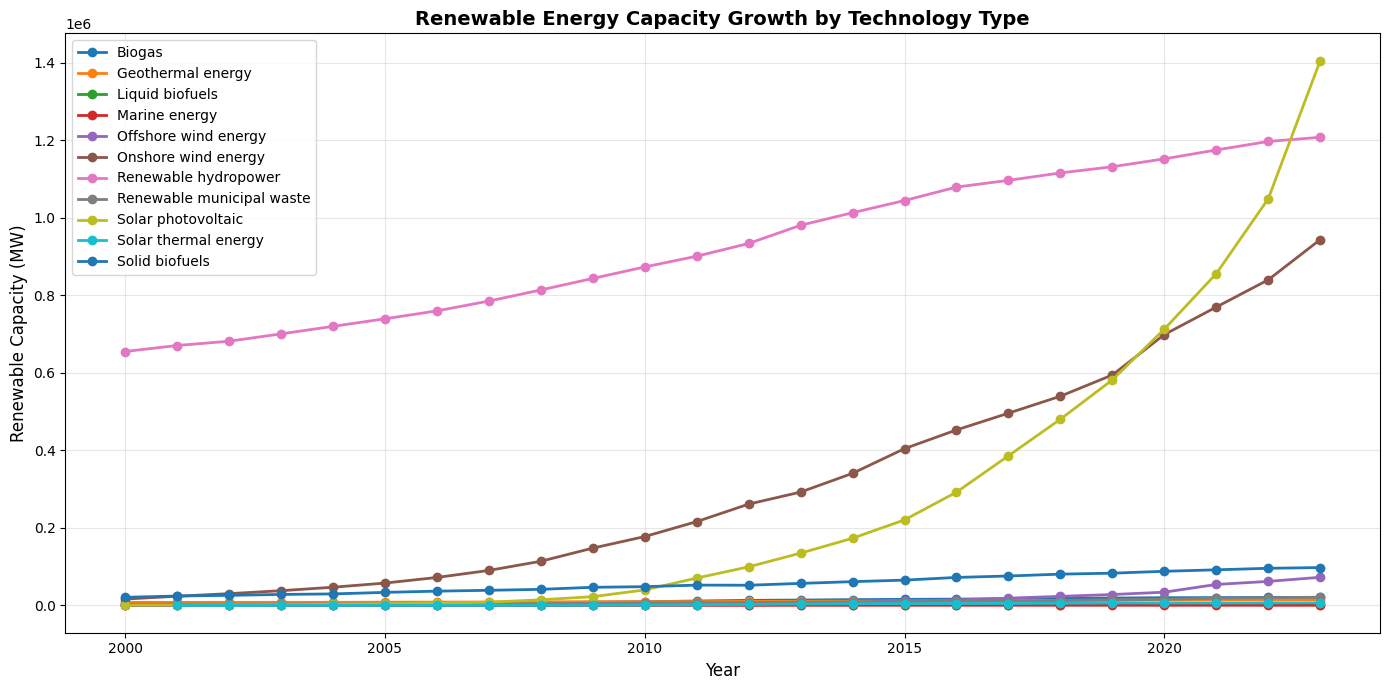

Technology trends visualization saved!


In [25]:
# Visualize technology trends
fig, ax = plt.subplots(figsize=(14, 7))
for tech in tech_analysis['Technology'].unique():
    tech_data = tech_analysis[tech_analysis['Technology'] == tech].sort_values('Year')
    ax.plot(tech_data['Year'], tech_data['Electricity Installed Capacity (MW)'], 
            marker='o', label=tech, linewidth=2, markersize=6)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Renewable Capacity (MW)', fontsize=12)
ax.set_title('Renewable Energy Capacity Growth by Technology Type', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/technology_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Technology trends visualization saved!")

## 6. Feature Engineering for ML Models

In [26]:
# Create featured dataset for ML
df_ml = df_clean.copy()

# Sort by Country, Technology, and Year
df_ml = df_ml.sort_values(['Country', 'Technology', 'Year'])

# Create features
df_ml['Capacity_Lag1'] = df_ml.groupby(['Country', 'Technology'])['Electricity Installed Capacity (MW)'].shift(1)
df_ml['Capacity_Lag2'] = df_ml.groupby(['Country', 'Technology'])['Electricity Installed Capacity (MW)'].shift(2)

# Calculate Year-over-Year Growth Rate
df_ml['YoY_Growth_Rate'] = df_ml.groupby(['Country', 'Technology'])['Electricity Installed Capacity (MW)'].pct_change() * 100

# Calculate cumulative capacity
df_ml['Cumulative_Capacity'] = df_ml.groupby(['Country', 'Technology'])['Electricity Installed Capacity (MW)'].cumsum()

# Regional features
regional_avg = df_clean.groupby(['Region', 'Year'])['Electricity Installed Capacity (MW)'].mean().reset_index()
regional_avg.columns = ['Region', 'Year', 'Regional_Avg_Capacity']
df_ml = df_ml.merge(regional_avg, on=['Region', 'Year'], how='left')

# Drop rows with NaN values
df_ml_clean = df_ml.dropna()

print(f"ML Dataset shape: {df_ml_clean.shape}")
print(f"\nML Dataset columns: {df_ml_clean.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_ml_clean.head())

ML Dataset shape: (20829, 12)

ML Dataset columns: ['Region', 'Country', 'Technology', 'Year', 'Electricity Installed Capacity (MW)', 'Prev_Year_Capacity', 'Growth_Rate (%)', 'Capacity_Lag1', 'Capacity_Lag2', 'YoY_Growth_Rate', 'Cumulative_Capacity', 'Regional_Avg_Capacity']

First few rows:
  Region      Country           Technology  Year  \
2   Asia  Afghanistan  Onshore wind energy  2014   
3   Asia  Afghanistan  Onshore wind energy  2015   
4   Asia  Afghanistan  Onshore wind energy  2016   
5   Asia  Afghanistan  Onshore wind energy  2017   
6   Asia  Afghanistan  Onshore wind energy  2018   

   Electricity Installed Capacity (MW)  Prev_Year_Capacity  Growth_Rate (%)  \
2                                  0.1                31.0       -99.677419   
3                                  0.1                31.0       -99.677419   
4                                  0.1                55.0       -99.818182   
5                                  0.1                99.5       -99.899497   

## 7. Export Cleaned Dataset and Features

In [ ]:
# Save cleaned datasets
df_clean.to_csv('../data/renewable_energy_clean1.csv', index=False)
df_ml_clean.to_csv('../data/renewable_energy_ml_features1.csv', index=False)
#(Compound Annual Growth Rate)
cagr_df.to_csv('../data/technology_cagr_analysis1.csv', index=False)

# Save summary statistics
summary_stats = {
    'Total Records': len(df_clean),
    'Countries': df_clean['Country'].nunique(),
    'Regions': df_clean['Region'].nunique(),
    'Technologies': df_clean['Technology'].nunique(),
    'Year Range': f"{int(df_clean['Year'].min())} - {int(df_clean['Year'].max())}",
    'Latest Year Capacity (MW)': df_clean[df_clean['Year'] == latest_year]['Electricity Installed Capacity (MW)'].sum(),
    'Average Capacity (MW)': df_clean['Electricity Installed Capacity (MW)'].mean()
}

import json
with open('../data/dataset_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=4)

print("All datasets exported successfully!")
print(f"\nFiles saved:")
print(f"  - renewable_energy_clean1.csv")
print(f"  - renewable_energy_ml_features1.csv")
print(f"  - technology_cagr_analysis1.csv")
print(f"  - dataset_summary1.json")

All datasets exported successfully!

Files saved:
  - renewable_energy_clean1.csv
  - renewable_energy_ml_features1.csv
  - technology_cagr_analysis1.csv
  - dataset_summary1.json
